/Users/d/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


[[ 53147.67610398 -10209.72284161]
 [-10209.72284161  90817.70792745]]


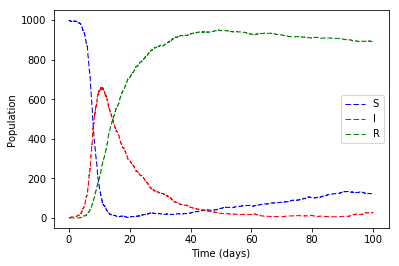

In [13]:


#Discrete event model using Gillespie's Direct Algorithm

import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
#np.random.seed(736)



for i in range(1):

    beta = 1
    gamma = 1/10
    mu = 0.003
    N0 = 1000.0 #population
    days = 100
    I = 1 
    S = N0 - I 
    R = 0

    SIR = np.array((S,I,R))

    
    def Gillespie_Sir(INPUT,ts): 
        sir = INPUT
        Change = np.zeros((6,3))
        #N = np.sum(sir)
        birth = mu*N0
        Change[2,:] = ([+1, 0, 0])
        infection = beta*sir[0]*sir[1]/N0
        Change[0,:] = ([-1, +1, 0])
        recovery = gamma*sir[1]
        Change[1,:] = ([0, -1, +1])
        death_s = mu*sir[0]
        Change[3,:] = ([-1, 0, 0])
        death_i = mu*sir[1]
        Change[4,:] = ([0, -1, 0])
        death_r = mu*sir[2]
        Change[5,:] = ([0, 0, -1])
        events = [infection, recovery, birth, death_s, death_i, death_r]
        R1 = np.random.rand()
        R2 = np.random.rand()
        ts = -np.log(R2)/(np.sum(events))
        m = np.amin(np.where(np.cumsum(events)>=R1*np.sum(events)))
        
        sir[list(range(3))]=sir[list(range(3))]+Change[m,:]
        return [sir,ts]

    def make_list(INPUT):
        total=0
        ts=0
        T=[0]
        S=[0]
        I=[0]
        R=[0]
        while T[total] < days:
            total += 1
            T.append(T[total-1]+ts)
            S.append(SIR[0])
            I.append(SIR[1])
            R.append(SIR[2])
            [res,ts] = Gillespie_Sir(SIR,ts)
            total += 1
            T.append(T[total-1])
            S.append(SIR[0])
            I.append(SIR[1])
            R.append(SIR[2])
        return np.array([T,S,I,R])

    [T,S,I,R] = make_list(SIR)
    
    plt.plot(T[1:], S[1:], '--b', linewidth = 1.0)
    plt.plot(T[1:], I[1:], '--r', linewidth = 1.0)
    plt.plot(T[1:], R[1:], '--g', linewidth = 1.0)
    plt.legend(loc='best')
    plt.xlabel('Time (days)')
    plt.ylabel('Population')
    #plt.xlim(50,)
    #plt.ylim(1, 20)
    #print(np.where(I == 0))  #print where I equals 0 and correpsonding values
    
    
    print(np.cov(I, S))
   

  

plt.legend('SIR')
plt.show()

/Users/d/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


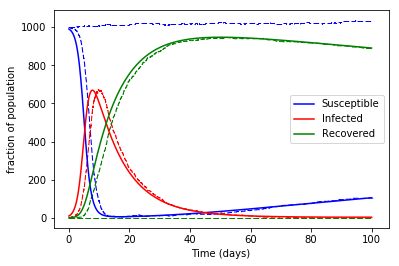

In [7]:
#This plots the stochastic model and the standard SIR model with demography in 1 plot

import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from scipy.integrate import odeint




for i in range(2):

    beta = 1
    gamma = 1/10
    mu = 0.002
    N0 = 1000.0 #population
    days = 100
    I = 1 
    S = N0 - I 
    R = 0

    SIR = np.array((S,I,R))

    
    def Gillespie_Sir(INPUT,ts): 
        sir = INPUT
        Change = np.zeros((6,3))
        #N = np.sum(sir)
        birth = mu*N0
        Change[2,:] = ([+1, 0, 0])
        infection = beta*sir[0]*sir[1]/N0
        Change[0,:] = ([-1, +1, 0])
        recovery = gamma*sir[1]
        Change[1,:] = ([0, -1, +1])
        death_s = mu*sir[0]
        Change[3,:] = ([-1, 0, 0])
        death_i = mu*sir[1]
        Change[4,:] = ([0, -1, 0])
        death_r = mu*sir[2]
        Change[5,:] = ([0, 0, -1])
        events = [infection, recovery, birth, death_s, death_i, death_r]
        R1 = np.random.rand()
        R2 = np.random.rand()
        ts = -np.log(R2)/(np.sum(events))
        m=np.amin(np.where(np.cumsum(events)>=R1*np.sum(events)))
        
        sir[list(range(3))]=sir[list(range(3))]+Change[m,:]
        return [sir,ts]

    def make_list(INPUT):
        total=0
        ts=0
        T=[0]
        S=[0]
        I=[0]
        R=[0]
        while T[total] < days:
            total += 1
            T.append(T[total-1]+ts)
            S.append(SIR[0])
            I.append(SIR[1])
            R.append(SIR[2])
            [res,ts] = Gillespie_Sir(SIR,ts)
            total += 1
            T.append(T[total-1])
            S.append(SIR[0])
            I.append(SIR[1])
            R.append(SIR[2])
        return np.array([T,S,I,R])

    [T,S,I,R] = make_list(SIR)
    
    plt.plot(T[1:], S[1:], '--b', linewidth = 1.0)
    plt.plot(T[1:], I[1:], '--r', linewidth = 1.0)
    plt.plot(T[1:], R[1:], '--g', linewidth = 1.0)
    plt.legend(loc='best')
    plt.xlabel('Time (days)')
    plt.ylabel('Population')
    #plt.xlim(50,)
    #plt.ylim(1, 100)
    
    #print(np.cov(I, S))
   
I0 = 0.01
S0= 1 - I0
R0 = 0

#Contact rate 
beta= 1
#Mean recovery rate, (1/days).
days = 10
gamma = 1./days
total_days = 100
#Life Expectancy
mu = 0.002


# The SIR model 
def SIR(y,t, beta, gamma):
    S, I, R = y
    dS_dt = mu - beta * S * I - mu * S
    dI_dt = beta * S * I - gamma * I - mu * I
    dR_dt = gamma * I - mu * R
    
    return dS_dt, dI_dt, dR_dt

# Start phase
y0 = S0, I0, R0
    
# Numerical Integration over time t
t = np.arange(0, total_days, .05)
ret = odeint(SIR, y0, t,  args=( beta, gamma))
S, I, R = ret.T * N0

#Plot

#fig = plt.figure()
#ax = fig.add_subplot(111, axisbelow=True)
plt.plot(t, S, 'b',label='Susceptible')
plt.plot(t, I, 'r', label='Infected')
plt.plot(t, R, 'g', label='Recovered')
plt.xlabel('Time (days)')
plt.ylabel('fraction of population')
plt.legend(loc='best')

    

#plt.legend('SIR')
plt.show()

/Users/d/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


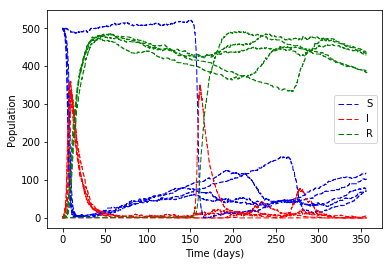

In [8]:
#This is the same Discrete event model but with added imports!

import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
np.random.seed(50)




for i in range(5):

    beta = 1
    delta = 0.01
    gamma = 1/10
    mu = 0.002
    N0 = 500.0 #population
    days = 356
    I = 1 
    S = N0 - I 
    R = 0

    SIR = np.array((S,I,R, 0,0))

    
    def Gillespie_Sir(INPUT,ts): 
        sir = INPUT
        Change = np.zeros((7,3))
        #N = np.sum(sir)
        birth = mu*N0
        Change[2,:] = ([+1, 0, 0])
        infection = beta*sir[0]*sir[1]/N0
        Change[0,:] = ([-1, +1, 0])
        recovery = gamma*sir[1]
        Change[1,:] = ([0, -1, +1])
        death_s = mu*sir[0]
        Change[3,:] = ([-1, 0, 0])
        death_i = mu*sir[1]
        Change[4,:] = ([0, -1, 0])
        death_r = mu*sir[2]
        Change[5,:] = ([0, 0, -1])
        imports = delta  
        Change[6,:] = [0, +1, 0]
        events = [infection, recovery, birth, death_s, death_i, death_r, imports]
        
        R1 = np.random.rand()
        R2 = np.random.rand()
        ts = -np.log(R2)/(np.sum(events))
        m = np.amin(np.where(np.cumsum(events)>=R1*np.sum(events)))
        if m == 7: 
            Change[4] = 1.
        
        sir[list(range(3))]=sir[list(range(3))]+Change[m,:]
        return [sir,ts]

    def make_list(INPUT):
        total=0
        ts=0
        T=[0]
        S=[0]
        I=[0]
        R=[0]
        dt=[0]
        while T[total] < days:
            total += 1
            T.append(T[total-1]+ts)
            S.append(SIR[0])
            I.append(SIR[1])
            R.append(SIR[2])
            dt.append(SIR[3])
            [res,ts] = Gillespie_Sir(SIR,ts)
            total += 1
            T.append(T[total-1])
            S.append(SIR[0])
            I.append(SIR[1])
            R.append(SIR[2])
            dt.append(SIR[3])
        return np.array([T,S,I,R,dt])

    [T,S,I,R,dt] = make_list(SIR)

    
    plt.plot(T[1:], S[1:], '--b', linewidth = 1.0)
    plt.plot(T[1:], I[1:], '--r', linewidth = 1.0)
    plt.plot(T[1:], R[1:], '--g', linewidth = 1.0)
    plt.legend(loc='best')
    plt.xlabel('Time (days)')
    plt.ylabel('Population')
    #plt.xlim(150, 299)
    #plt.ylim(0, 300)
    #print(np.where(I == 0))  #Shows whether a simulation experiences an extinction
      
    
    
    

    

plt.legend('SIR')
plt.show()

/Users/d/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:43: RuntimeWarning: divide by zero encountered in double_scalars


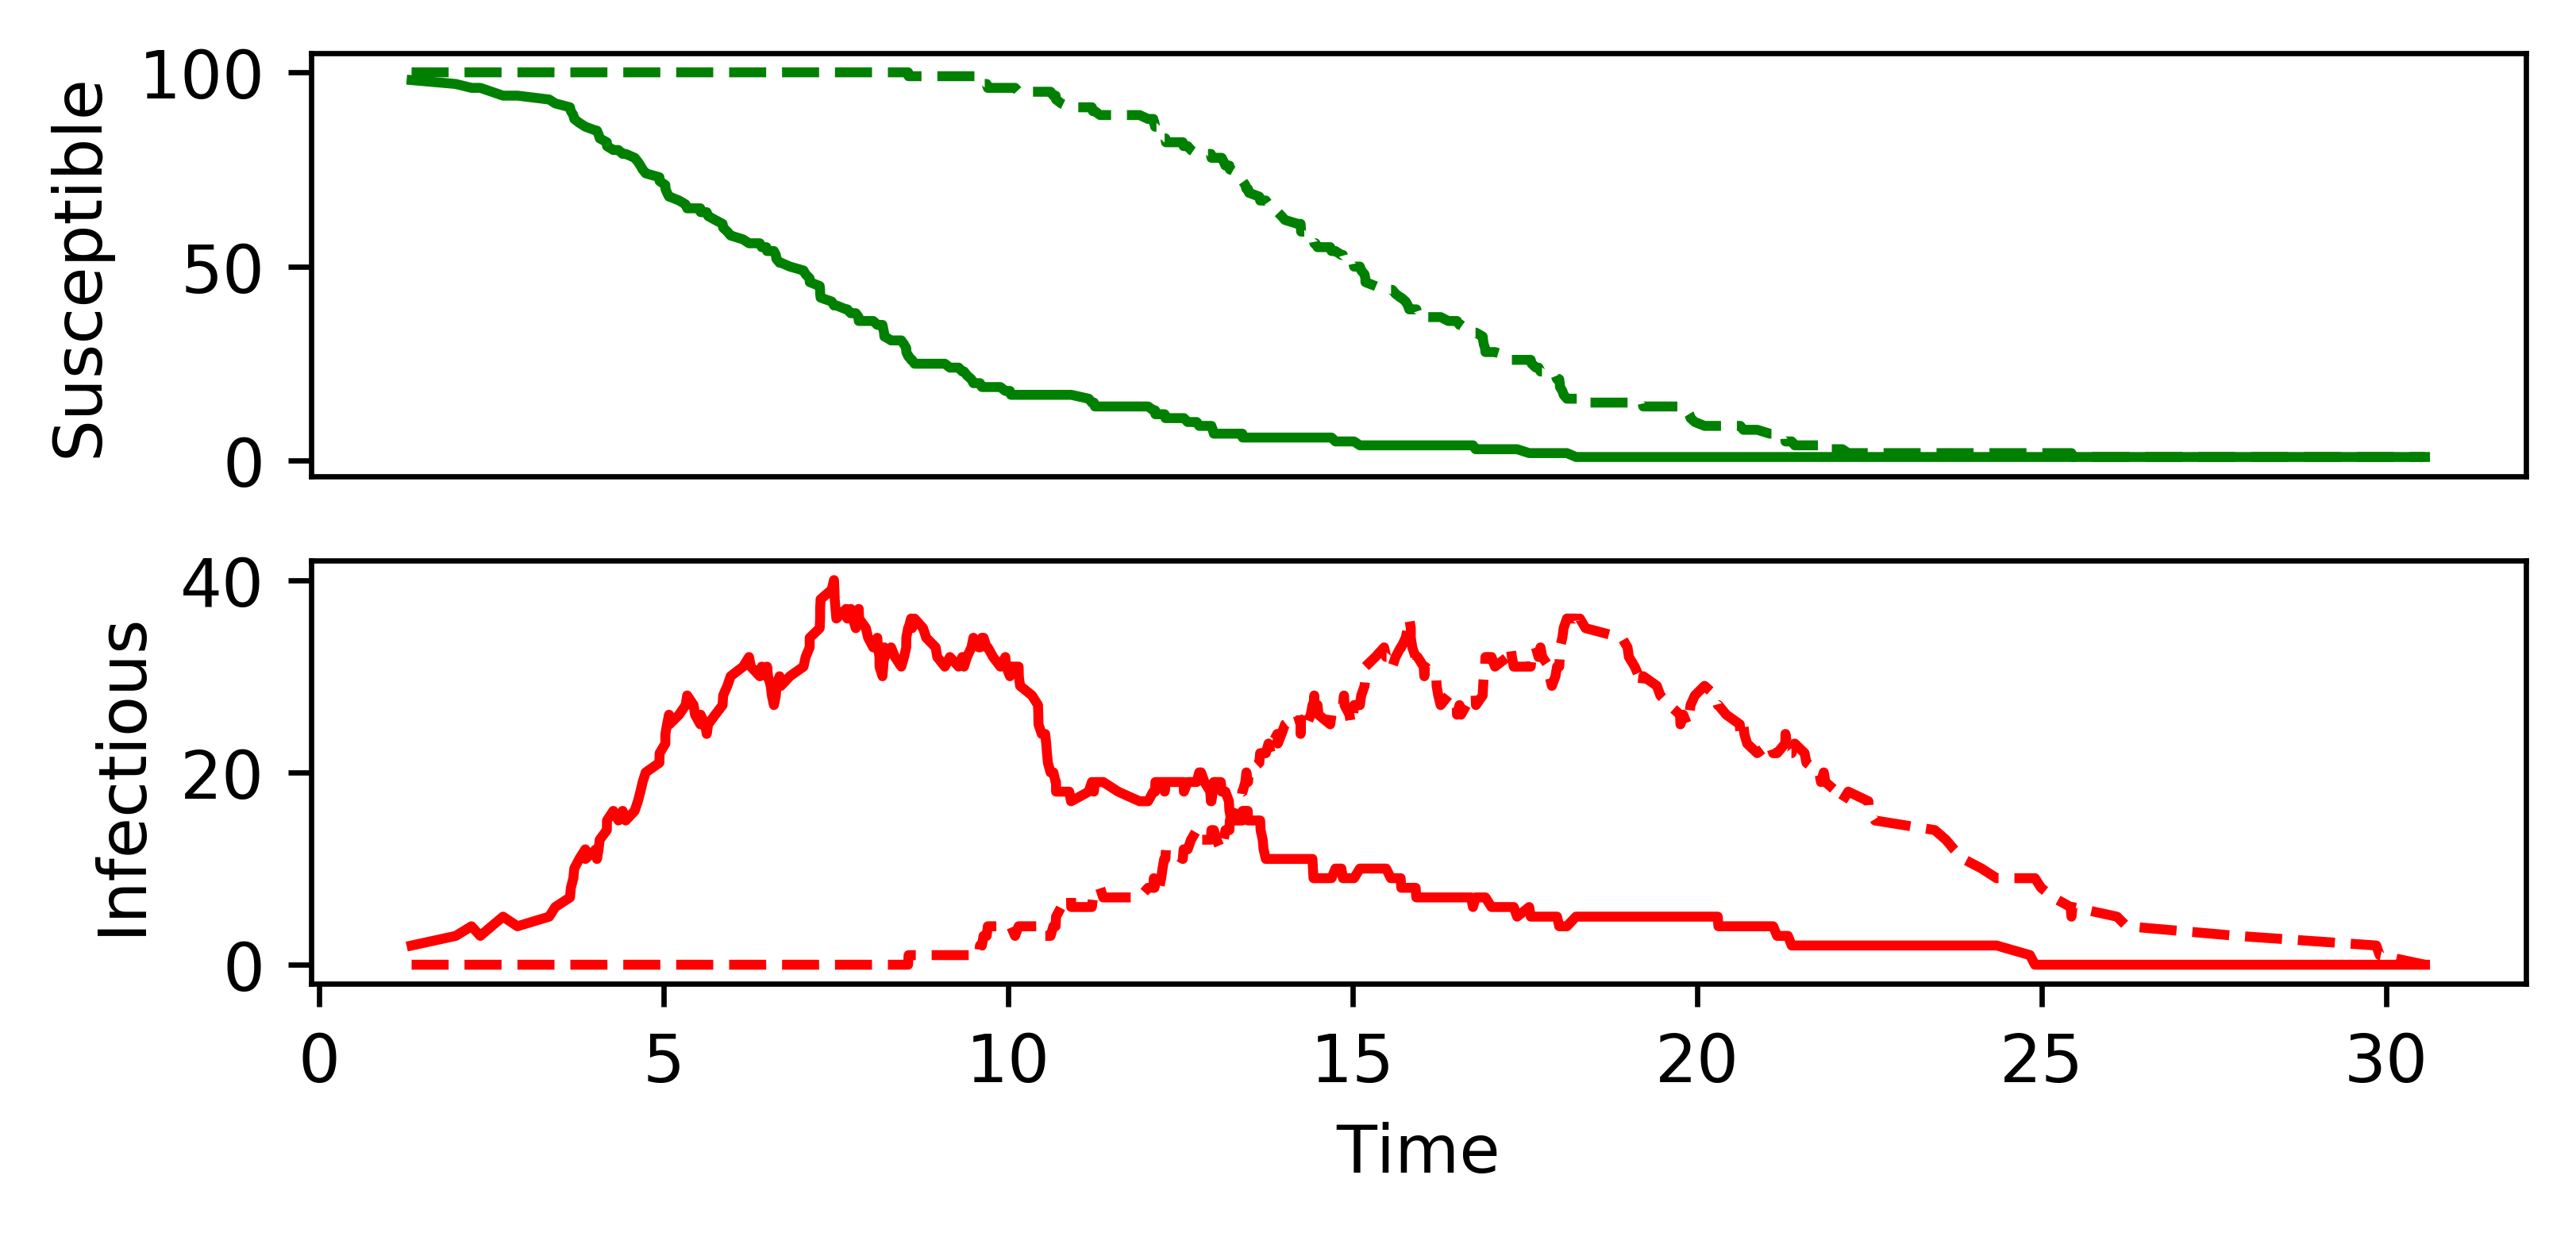

In [10]:
# stochastic meta-population model for 2 sub-populations

import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
np.random.seed(1010)


beta = 2
gamma = 0.3
mu= 0.003

events = []

days = 100
N0 = 200
X0 = [99, 100]
Y0 = [1, 0]
Z0 = [0,0]
rho_ii = 1
rho_ij = 0.7

# individual model with demograpy and stocasticity
def stoc_eqs_meta(INP,delta_t): 
    V = INP
    
    Event = np.zeros((6))
    
    Event[0] = beta*V[0][0]*V[0][1]/N0  # infected population 1
    Event[1] = gamma*V[0][1]            # recovered population 1
    
    Event[2] = beta*V[1][0]*V[1][1]/N0  # infected population 2
    Event[3] = gamma*V[1][1]            # recovered population 2
    
    Event[4] = beta * rho_ii *(V[1][1]/N0) # infect population 1
    Event[5] = beta * rho_ij *(V[0][1]/N0) # infect population 2

    
    R1 = np.random.rand()
    R2 = np.random.rand()
        
    # For each event, m calculate the time until it next occurs delta t
    delta_t = -np.log(R2)/(np.sum(Event))
    
    m = np.amin(np.where(np.cumsum(Event)>=R1*np.sum(Event)))
    
    events.append(m)
    
    if m == 0:
        V[0][0] = V[0][0] - 1
        V[0][1] = V[0][1] + 1

    elif m == 1:
        V[0][1] = V[0][1] - 1
        V[0][2] = V[0][2] + 1
         
    elif m == 2:
        V[1][0] = V[1][0] - 1
        V[1][1] = V[1][1] + 1  
        
    elif m == 3:
        V[1][1] = V[1][1] - 1
        V[1][2] = V[1][2] + 1
        
    elif m == 4:
        V[0][0] = V[0][0] - 1
        V[0][1] = V[0][1] + 1
        
    elif m == 5:
        V[1][0] = V[1][0] - 1
        V[1][1] = V[1][1] + 1  

    return [V,delta_t]

def make_list(INPUT):
    lop = 0
    delta_t = 0
    T = [0]
    S1 = [0]
    I1 = [0]
    R1 = [0]
    
    S2 = [0]
    I2 = [0]
    R2 = [0]
    
    while T[lop] < days:
        [res,delta_t] = stoc_eqs_meta(INPUT,delta_t)
        lop=lop+1
        T.append(T[lop-1]+delta_t)
        S1.append(INPUT[0][0])
        I1.append(INPUT[0][1])
        R1.append(INPUT[0][2])
        
        S2.append(INPUT[1][0])
        I2.append(INPUT[1][1])
        R2.append(INPUT[1][2])
    return [T,S1,I1,R1,S2,I2,R2]

#infection rate _ recovery rate _ birth death rate _ population size


INPUT = [[X0[0], Y0[0], Z0[0]] , [X0[1], Y0[1], Z0[1] ]]

timestep=0.0

[T,S1,I1,R1,S2,I2,R2] = make_list(INPUT)

tT = np.array(T)[1:,]
tS1 = np.array(S1)[1:,]
tI1 = np.array(I1)[1:,]


tS2 = np.array(S2)[1:,]
tI2 = np.array(I2)[1:,]
 

plt.figure(dpi=600)

ax1=plt.subplot(311)
plt.plot(tT, tS1, 'g', label='Population 1')
plt.ylabel ('Susceptible')


ax2=plt.subplot(312)
plt.plot(tT, tI1, 'r', label='Population 1')
plt.ylabel ('Infectious')
plt.xlabel('Time')


plt.subplot(311)
plt.plot(tT, tS2, '--g', label='Population 2')
plt.ylabel ('Susceptible')


plt.subplot(312)
plt.plot(tT, tI2, '--r', label='Population 2')
plt.ylabel ('Infectious')



ax1.axes.get_xaxis().set_visible(False)

plt.show()

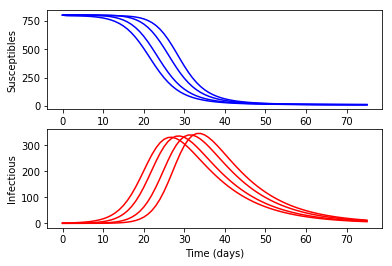

In [11]:
# Deterministic model for multiple sub-populations

import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties as fmp

n = 4 #number_of_subpopulations
beta = 0.8 * np.ones(n) #makes sure beta is the same for every sub-population
gamma = 0.1 * np.ones(n) #makes sure gamma is the same for every sub-population
population = np.zeros(n*n)
susceptibles = np.zeros(n*n)
for i in np.arange(0,n*n,n+1):
    population[i] = 1500.0
    susceptibles[i] = 800.0

infecteds = np.zeros(n*n)
infecteds[0] = 1.0
days = 75.
TS = 1.0

l = np.zeros((n,n))
r = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        if abs(i-j)==1: 
            l[i][j] = 0.2
r = 3 * np.ones((n,n))
r = r-np.diag(np.diag(r))

INPUT0 = np.hstack((susceptibles,infecteds,population))
INPUT = np.zeros((3*n*n))
for i in range(n*n):
    INPUT[3*i] = INPUT0[i]
    INPUT[1+3*i] = INPUT0[n*n+i]
    INPUT[2+3*i] = INPUT0[2*n*n+i]

def diff_eqs(INP,t):  
    
    Y = np.zeros((3*n*n))
    V = INP   
    sumY = np.zeros(n)
    sumN = np.zeros(n)
    
    # determining number currently in Subpopulation i
    for i in range(n):
        sumY[i] = 0.0
        sumN[i] = 0.0
        for j in range(n):
            k=3*(j+i*n)
            sumN[i]+=V[2+k]
            sumY[i]+=V[1+k]

    ##Set all rates to zeros
    for i in range(n):
        for j in range(n):
            k=3*(j+i*n)
            Y[k]=0; Y[1+k]=0; Y[2+k]=0
    
    for i in range(n):
        for j in range(n):
            # Calculate the rates
            k = 3 * (j+i*n) 
            K = 3 * (i+j*n)
            h = 3 * (i+i*n)
            H = 3 * (j+j*n)
            
            Y[k] -= (beta[i]*V[k]*(sumY[i]/sumN[i]))
            Y[k+1] += (beta[i]*V[k]*(sumY[i]/sumN[i]))
            Y[k+1] -= (gamma[i]*V[k+1])
            
            #commuting, moving between sub-populations
            Y[h] += r[j][i]*V[K]
            Y[h] -= l[j][i]*V[h]
            
            Y[h+1] += r[j][i]*V[K+1]
            Y[h+1] -= l[j][i]*V[h+1]
            
            Y[h+2] += r[j][i]*V[K+2]
            Y[h+2] -= l[j][i]*V[h+2]
            
            Y[k] += l[i][j]*V[H]
            Y[k] -= r[i][j]*V[k]
            
            Y[1+k] += l[i][j]*V[1+H]
            Y[1+k] -= r[i][j]*V[1+k]
            
            Y[2+k] += l[i][j]*V[2+H]
            Y[2+k] -= r[i][j]*V[2+k]
    return Y   

t_start = 0.0 
t_end = days
t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
t_course = spi.odeint(diff_eqs,INPUT,t_range)
tc = t_course

# Plot
totalS = np.zeros((len(tc),5))
totalI = np.zeros((len(tc),5))

for i in range(n):
    for j in range(n):
        k = 3*(j+i*n)
        totalS[:,i] += tc[:,k]
        totalI[:,i] += tc[:,k+1]


#print len(totalS)
plt.subplot(211)
for i in range(n):
    plt.plot(t_range,totalS[:,i], color='b')
plt.xlabel('Time (days)')
plt.ylabel('Susceptibles')

plt.subplot(212)
for i in range(n):
    plt.plot(t_range,totalI[:,i], color='r')
plt.xlabel('Time (days)')
plt.ylabel('Infectious')

plt.show()